In [2]:
import networkx as nx
import matplotlib.pyplot as plt

from math import inf as int_inf
from collections import defaultdict

import utils

In [3]:
vertices_xyc = utils.G_3_tirs_perturbed
# vertices_xyc = utils.G_3_tirs
# vertices_xyc = utils.G_simple

In [4]:
components_c_xy = defaultdict(lambda: [])
for x, y, c in vertices_xyc:
    components_c_xy[c].append((x, y))

node_color = list(map(lambda x: x[2], vertices_xyc))
pos = {}
for i, xyc in enumerate(vertices_xyc):
    pos[i + 1] = xyc[:2]

In [18]:
print(*vertices_xyc, sep='\n')
to_idx = {'coral': 1, 'aqua': 2, 'crimson': 3, 'lime': 4}
d = [f'{len(vertices_xyc)}\n']
d += [f'{round(xyc[0], 4): .4f} {round(xyc[1], 4): .4f} {to_idx[xyc[2]]}\n'
     for xyc in vertices_xyc]
print(d)
with open('dataset_0_10e1.in', 'w') as fp:
    fp.writelines(d)

(0, 0, 'coral')
(6.123233995736766e-17, -1.0, 'aqua')
(0.8000000000000002, -2.0, 'aqua')
(-0.4999999999999999, -2.0, 'aqua')
(-0.8660254037844386, 0.5000000000000001, 'crimson')
(-2.132050807568877, 0.3071796769724493, 'crimson')
(-1.4820508075688772, 1.4330127018922196, 'crimson')
(0.8660254037844387, 0.49999999999999994, 'lime')
(1.3320508075688775, 1.692820323027551, 'lime')
(1.9820508075688774, 0.5669872981077806, 'lime')
['10\n', ' 0.0000  0.0000 1\n', ' 0.0000 -1.0000 2\n', ' 0.8000 -2.0000 2\n', '-0.5000 -2.0000 2\n', '-0.8660  0.5000 3\n', '-2.1321  0.3072 3\n', '-1.4821  1.4330 3\n', ' 0.8660  0.5000 4\n', ' 1.3321  1.6928 4\n', ' 1.9821  0.5670 4\n']


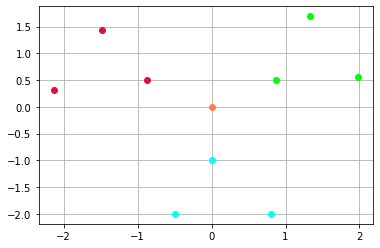

In [5]:
# plt.xlim([-1, 3])
# plt.ylim([-1, 11])
plt.grid()
for x, y, c in vertices_xyc:
    plt.plot(x, y, 'bo', color=c)

Create graphs and add their vertices to them

In [6]:
Components = [nx.Graph(color=color) for color in components_c_xy.keys()]

offset = 1
for G, ckey in zip(Components, components_c_xy.keys()):
    nodes = components_c_xy[ckey]
    for i, xy in enumerate(nodes, start=offset):
        G.add_node(i, pos=xy, color=ckey)
    offset += len(nodes)

Add edges

In [7]:
offset = 0
for G, ckey in zip(Components, components_c_xy.keys()):
    nodes = components_c_xy[ckey]
    for ii in range(len(nodes)):
        for jj in range(ii + 1, len(nodes)):
            i = ii + offset
            j = jj + offset
            u_xy = nodes[ii]
            v_xy = nodes[jj]
            d = utils.euclidian_dist(u_xy, v_xy)
            G.add_edge(i + 1, j + 1, weight=d)
    offset += len(nodes)

Create a graph that contains all components. It is only used for visualization purposes.

In [8]:
GAll = nx.compose_all(Components)

Gather node colors into a single list.

In [9]:
G_node_color = list(map(lambda x: x[1]['color'], GAll.nodes(data=True)))

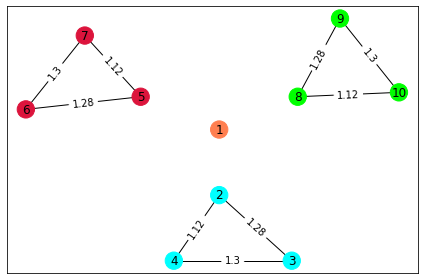

In [10]:
fig = plt.figure()
utils.draw_graph(GAll, pos=pos, node_color=G_node_color)
fig.tight_layout()
fig.savefig("phase2a_States.png", format="PNG")

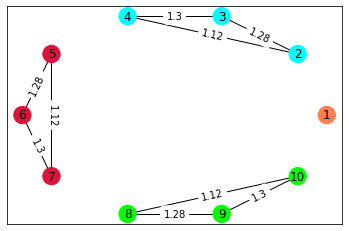

In [11]:
utils.draw_graph(GAll, node_color=G_node_color)

Run Kruskal for each component

In [12]:
mcsts = [nx.minimum_spanning_tree(c, algorithm='kruskal') for c in Components]

Run Floyd-Warshall for each component.

In [13]:
results = [None for _ in Components]

for i, G in enumerate(Components):
    results[i] = (G.graph['color'], nx.floyd_warshall(G))

For each component, find out it's capital and color it in gold.

In [14]:
capital = {}
CapitalsG = nx.Graph()

offset = 1
for color, comp in results:
#     print(color)
    max_min_dist = int_inf
    cap = None
    for node_idx in comp.keys():
        res_fw = comp[node_idx]
        dist = max(res_fw.values())
#         print(node_idx, 'cost:', dist)
        if max_min_dist > dist:
            max_min_dist = dist
            cap = node_idx
    offset += len(comp)
    capital[color] = cap
    GAll.nodes[cap]['color'] = 'gold'
    CapitalsG.add_node(cap, color=color, pos=(GAll.nodes[cap]['pos']))
#     print(f'capital for {color}: {cap}\n-------')

In [15]:
G_node_color = list(map(lambda x: x[1]['color'], GAll.nodes(data=True)))

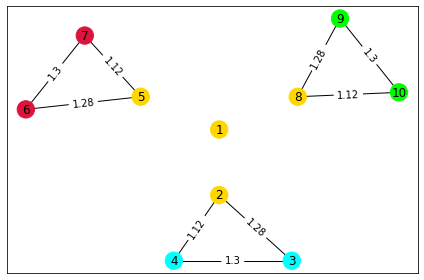

In [16]:
fig = plt.figure()
utils.draw_graph(GAll, node_color=G_node_color, pos=pos)
fig.tight_layout()
fig.savefig("phase2a_Capitals.png", format="PNG")

In [17]:
print(capital)

{'coral': 1, 'aqua': 2, 'crimson': 5, 'lime': 8}


In [18]:
# Capital_pos = {}
# for i, xyc in enumerate(vertices_xyc):
#     pos[i + 1] = xyc[:2]

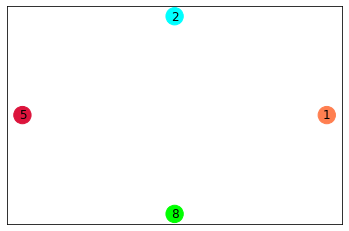

In [19]:
CapitalsG_node_color = list(map(lambda x: x[1]['color'], CapitalsG.nodes(data=True)))
utils.draw_graph(CapitalsG, node_color=CapitalsG_node_color)

Add edges for the total MCST graph

In [20]:
n = len(CapitalsG)
node_list = list(CapitalsG.nodes)
for i, u_lbl in zip(range(n), CapitalsG.nodes):
    for v_lbl in node_list[i + 1:]:
            u_xy = CapitalsG.nodes[u_lbl]['pos']
            v_xy = CapitalsG.nodes[v_lbl]['pos']
            d = utils.euclidian_dist(u_xy, v_xy)
            CapitalsG.add_edge(u_lbl, v_lbl, weight=d)

[(1, 2, {'weight': 1.0}), (1, 5, {'weight': 1.0}), (1, 8, {'weight': 1.0}), (2, 5, {'weight': 1.7320508075688772}), (2, 8, {'weight': 1.7320508075688772}), (5, 8, {'weight': 1.7320508075688772})]


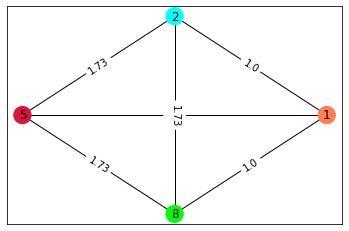

In [21]:
print(CapitalsG.edges(data=True))
utils.draw_graph(CapitalsG, node_color=CapitalsG_node_color)

In [27]:
mcsts.append(nx.minimum_spanning_tree(CapitalsG, algorithm='kruskal'))
MCSTsG = nx.compose_all(mcsts)
w = sum(map(lambda n: n[2]['weight'], MCSTsG.edges(data=True)))

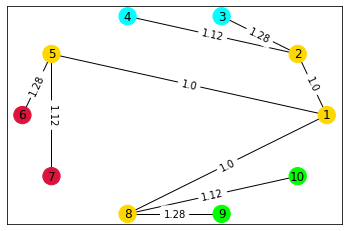

In [28]:
utils.draw_graph(MCSTsG, node_color=G_node_color)

[(1, 2), (1, 5), (1, 8), (2, 4), (2, 3), (5, 7), (5, 6), (8, 10), (8, 9)]
MCST's Weight: 10.195976508709393


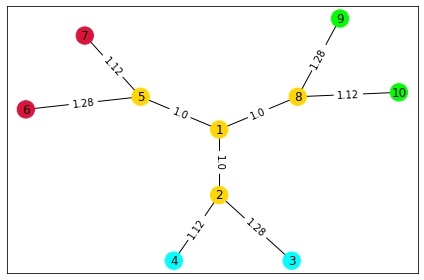

In [29]:
print(MCSTsG.edges)
print('MCST\'s Weight:', w)
fig = plt.figure()
utils.draw_graph(MCSTsG, node_color=G_node_color, pos=pos, ax=fig.add_subplot())
fig.tight_layout()
fig.savefig("phase2a_Result.png", format="PNG")

In [30]:
with open('phase2_a.ans', 'w') as fp:
    fp.write(str(round(w, 2)))